# Synthesis of all algorithms


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

## a synthesis



In [3]:
%%writefile data_cache/synthesis.py

try:
    import sys
    command = sys.argv[1]
except:
    command = 'run'

metatag = 'synthesis_'
from shl_scripts.shl_experiments import SHL_set
verbose = 0
default = dict(eta=.02, beta1=.9, beta2=.999, epsilon=1.e-8, n_iter=2**10+1,
               nb_quant=128, n_dictionary=23**2, patch_width=12, verbose=verbose)

opts = {}
opts['nohomeo'] = dict(homeo_method='None')
opts['EMP'] = dict(homeo_method='EMP', eta_homeo=0.05, alpha_homeo=0.4)
opts['EXP'] = dict(homeo_method='EXP', eta_homeo=0.05, alpha_homeo=0.05)
opts['HAP'] = dict(homeo_method='HAP', eta_homeo=0.05, alpha_homeo=1.)
#opts['HEH'] = dict(homeo_method='HEH', eta_homeo=0.05, C=5., nb_quant=128, P_cum=None)

variables = ['eta', 'alpha_homeo', 'eta_homeo', 'l0_sparseness', 'n_dictionary']
display_variables = ['error', 'logL', 'cputime']

if command == 'run':
    for variable in variables:
        for tag in opts.keys():
            opts[tag].update(default)
            experiments = SHL_set(opts[tag], tag=metatag + tag)
            experiments.scan(variable=variable, list_figures=[], display='')

if command == 'plot':
    import matplotlib.pyplot as plt

    for variable in variables:
        for display_variable in display_variables:
            fig, ax = None, None

            for tag in opts.keys():
                #print(opts[tag], display_variable)
                opts[tag].update(default)
                experiments = SHL_set(opts[tag], tag=metatag + tag)
                fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', fig=fig, ax=ax, label=tag, display_variable=display_variable)

            ax.legend()
            plt.show()            

Overwriting data_cache/synthesis.py


In [4]:
%run data_cache/synthesis.py load

In [5]:
!ls -l {experiments.shl.data_cache}/synthesis_*
!rm -fr  {experiments.shl.data_cache}/synthesis_*lock*

ls: {experiments.shl.data_cache}/synthesis_*: No such file or directory


## CPU time as a function of the number of dictionary elements



In [6]:
%run data_cache/synthesis.py run

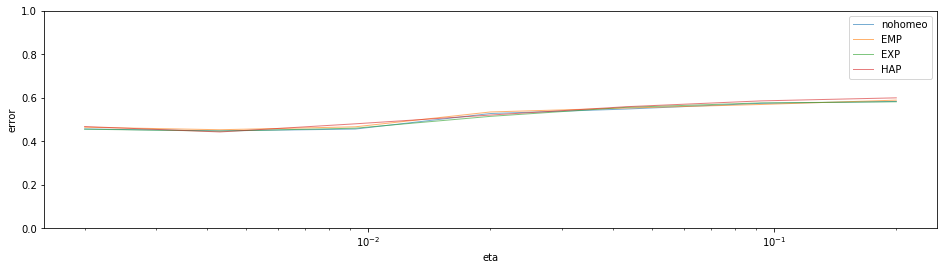

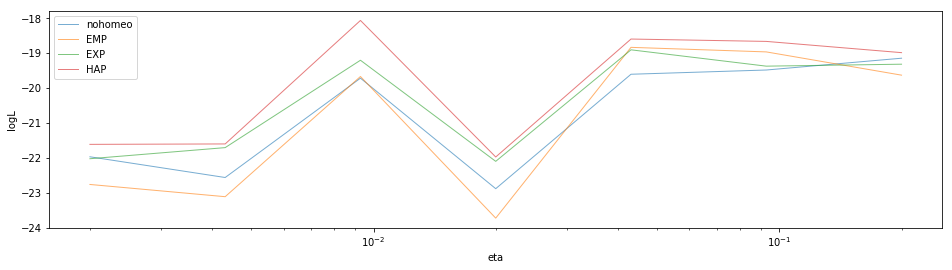

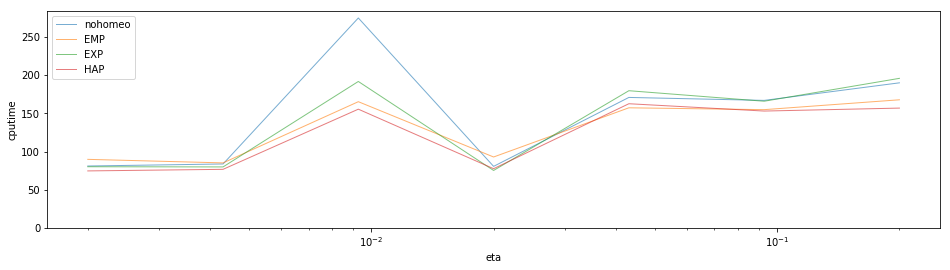

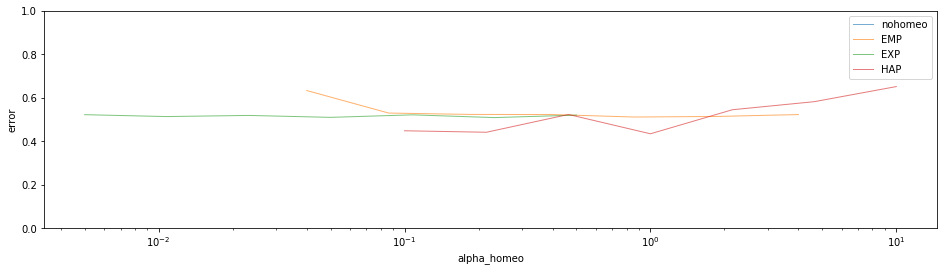

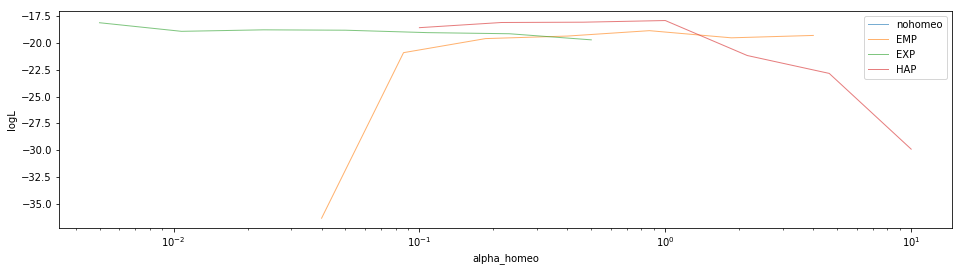

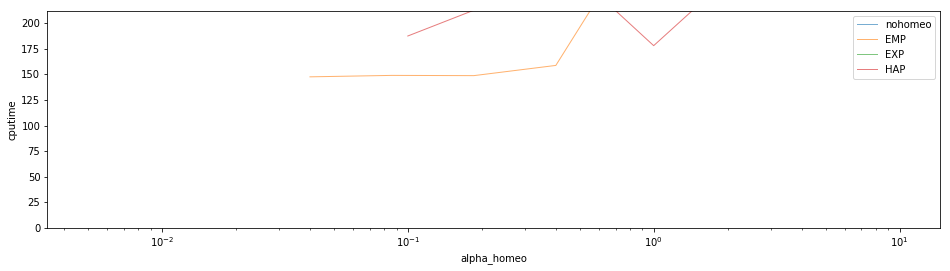

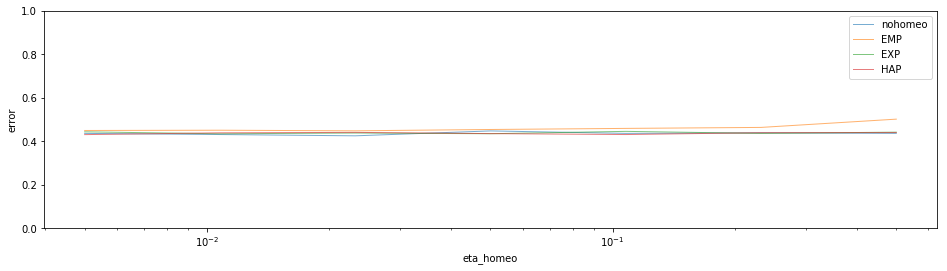

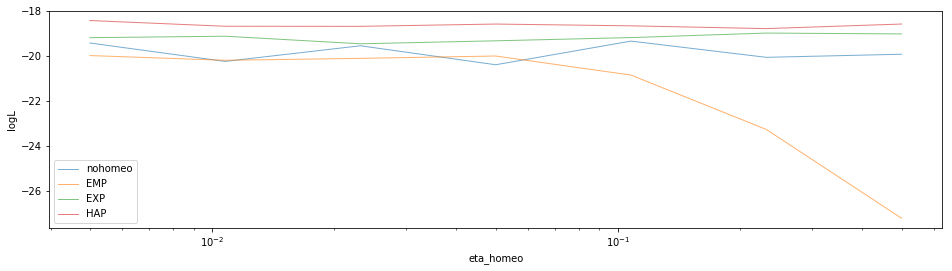

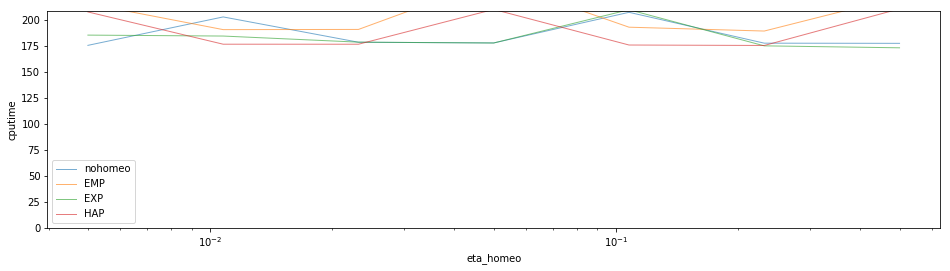

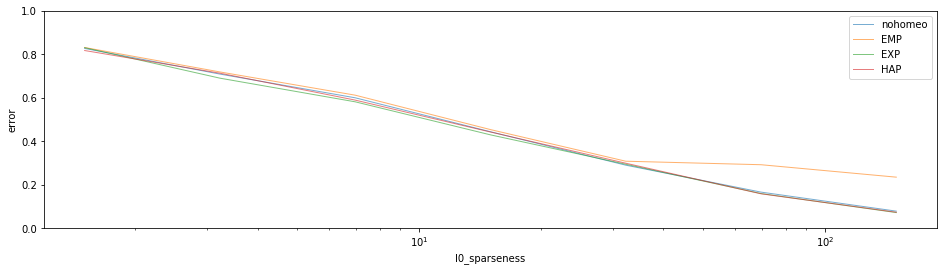

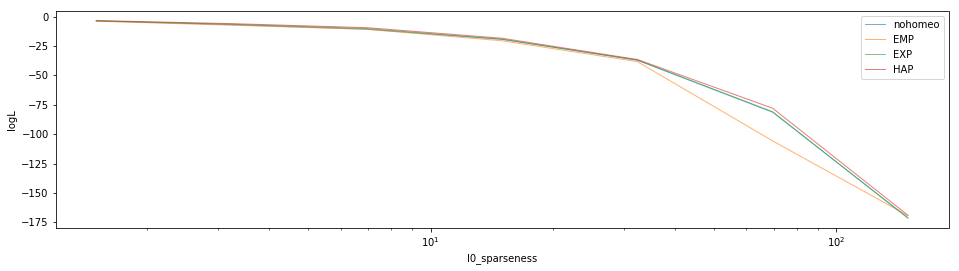

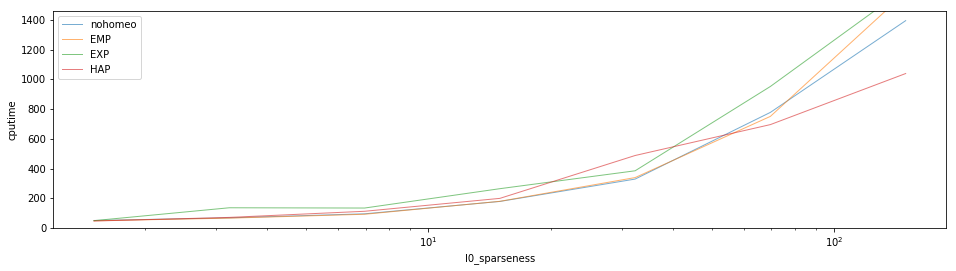

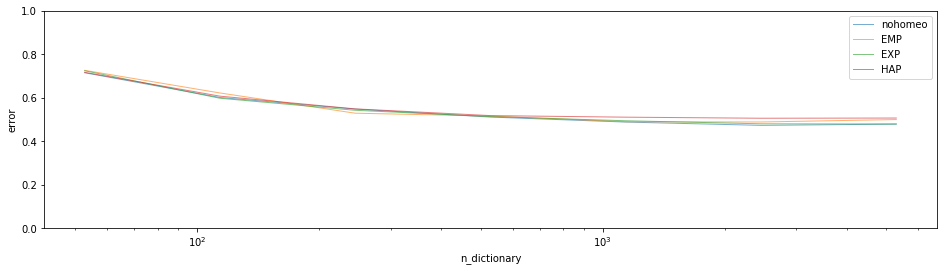

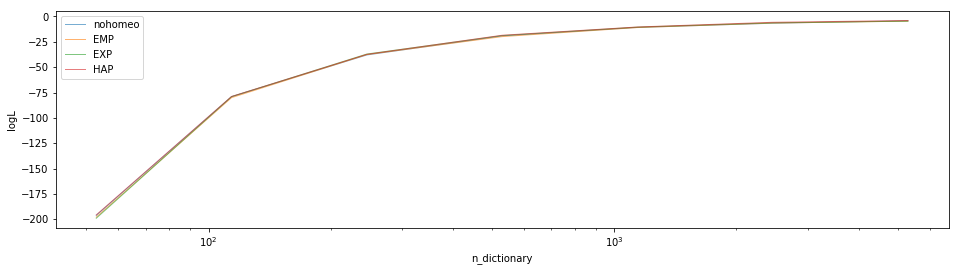

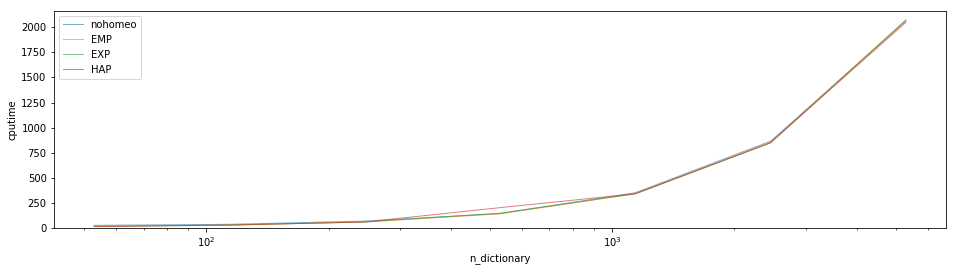

In [7]:
%run data_cache/synthesis.py plot

In [8]:
experiments.shl.patch_width


12


tester:
- l0 sparseness avec MP et OMP

## Version used

In [9]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas

Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.2.1
OS Darwin 17.4.0 x86_64 i386 64bit
numpy 1.14.0
shl_scripts 20171221
pandas 0.22.0
Wed Feb 21 09:01:51 2018 CET